# Resonator Coupling

---

### 0.1 Prerequisite

- When changing the python class in the lib directory please restart kernel.
- When launching the jupyter notebook please always firstly run this cell.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import constants
import scipy.sparse.linalg
import scipy.sparse as sparse
import qutip.settings as settings
from tqdm import tqdm
import qutip as qt
qt.settings.atol = 1e-100
qt.settings.auto_tidyup_atol = qt.settings.atol
current_dir = os.getcwd()
# Get the parent folder path
parent_dir = os.path.dirname(current_dir)
# Add the parent folder path to sys.path
sys.path.append(parent_dir)

from lib.transmon import transmon
from lib.circuit_res_coupling import circuit_res

# plt.style.use("Solarize_Light2")
plt.style.use('dark_background')
thememap = 'viridis'

# Setting up constants
h = constants.h
hbar = constants.hbar
pi = np.pi

---

## 2. Cavity Coupling

### 2.1 Visualization of the Hamiltonian

In [2]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 12e-15
Cc2 = 12e-15

Ej_p = 9e9
Ej_t = 8e9
Cp = 150e-15
Ct = 170e-15
ncut_p = 5
ncut_t = 5

L_res = 10e-9
C_res = 100e-15
m_cut = 3

# Creation of circuit object
system_10 = circuit_res([Cc1, Cc2], ng, C_res, L_res, m_cut, [transmon(Ej_p, Cp, ng, ncut_p), transmon(Ej_t, Ct, ng, ncut_t)])

C_mat = [
    [Cp + Cc1, -Cc1, 0, 0],
    [-Cc1, Cc1 + C_res, -C_res, 0],
    [0, -C_res, C_res + Cc2, -Cc2],
    [0, 0, -Cc2, Cc2 + Ct]
]

print(np.linalg.inv(C_mat))


[[6.43177893e+12 3.49568221e+12 3.14335060e+12 2.07253886e+11]
 [3.49568221e+12 4.71917098e+13 4.24352332e+13 2.79792746e+12]
 [3.14335060e+12 4.24352332e+13 4.71502591e+13 3.10880829e+12]
 [2.07253886e+11 2.79792746e+12 3.10880829e+12 5.69948187e+12]]


H_circ =  Quantum object: dims = [[11, 3, 3, 11], [11, 3, 3, 11]], shape = (1089, 1089), type = oper, isherm = True
Qobj data =
[[ 2.85020348e-23+0.j -2.65042806e-24+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-2.65042806e-24+0.j  2.58685630e-23+0.j -2.65042806e-24+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -2.65042806e-24+0.j  2.38203072e-23+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   2.54877316e-23+0.j -2.65042806e-24+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
  -2.65042806e-24+0.j  2.75359874e-23+0.j -2.65042806e-24+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j -2.65042806e-24+0.j  3.01694592e-23+0.j]]


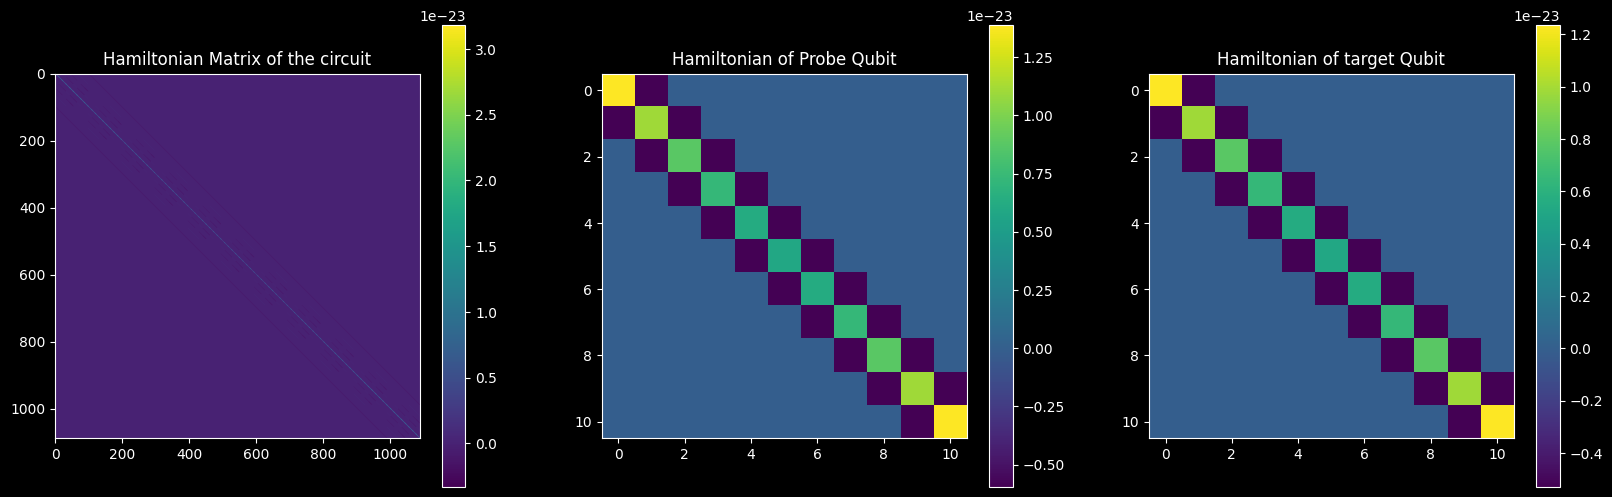

In [4]:
# Exctracting the Hamiltonian
H_circ = system_10.get_H_circuit()
H_p = system_10.get_H_probe()
H_t = system_10.get_H_target()
H_res = system_10.get_H_resonator()

print('H_circ = ', H_circ)
H_circ = H_circ.full()
H_p = H_p.full()
H_t = H_t.full()
H_res = H_res.full()

f = plt.figure(figsize=(20,6))

# Plotting the Hamiltonian
ax1 = f.add_subplot(131)
ax1.title.set_text('Hamiltonian Matrix of the circuit')
im1 = ax1.imshow(np.real(H_circ), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(132)
ax2.title.set_text('Hamiltonian of Probe Qubit')
im2 = ax2.imshow(np.real(H_p), cmap=plt.get_cmap(thememap))
f.colorbar(im2)


ax3 = f.add_subplot(133)
ax3.title.set_text('Hamiltonian of target Qubit')
im3 = ax3.imshow(np.real(H_t), cmap=plt.get_cmap(thememap))
f.colorbar(im3)

# ax4 = f.add_subplot(134)
# ax4.title.set_text('Hamiltonian of resonator')
# im4 = ax4.imshow(np.real(H_res), cmap=plt.get_cmap(thememap))
# f.colorbar(im4)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# ax4.grid(False)

plt.show()

kin_probe =  Quantum object: dims = [[11], [11]], shape = (11, 11), type = oper, isherm = True
Qobj data =
[[7.92274681e-24 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.07055796e-24 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.85218885e-24 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.26763949e-24
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.16909872e-25 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0

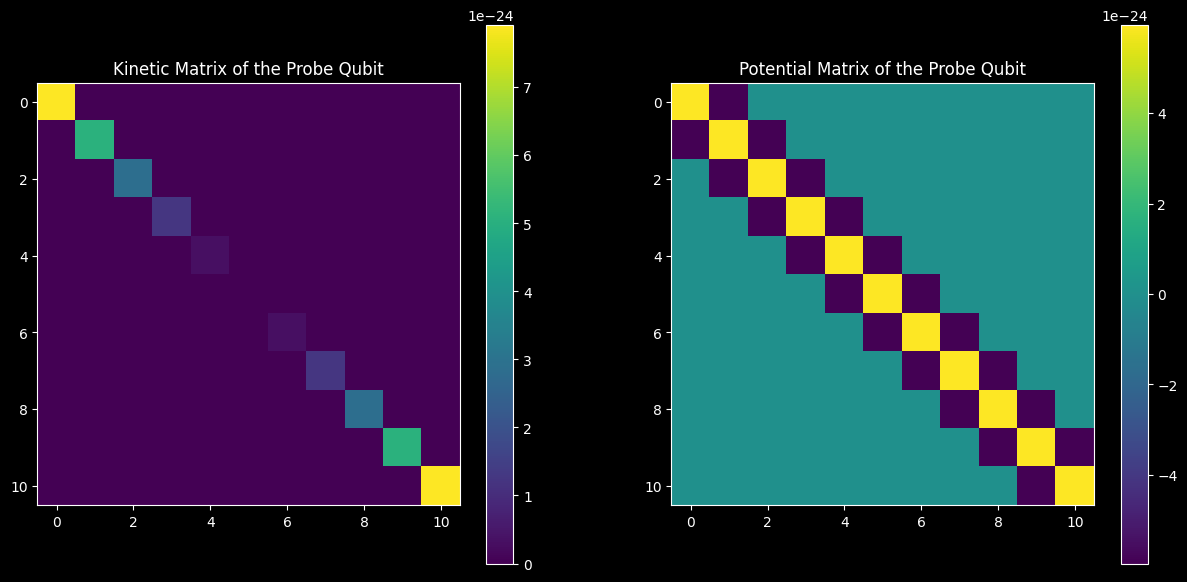

In [5]:
kin_probe = system_10.get_kinetic_probe()
pot_probe = system_10.get_potential_probe()
print('kin_probe = ', kin_probe)
kin_probe = kin_probe.full()
pot_probe = pot_probe.full()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Probe Qubit')
im1 = ax1.imshow(np.real(kin_probe), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Probe Qubit')
im2 = ax2.imshow(np.real(pot_probe), cmap=plt.get_cmap(thememap))
f.colorbar(im2)

ax1.grid(False)
ax2.grid(False)

plt.show()

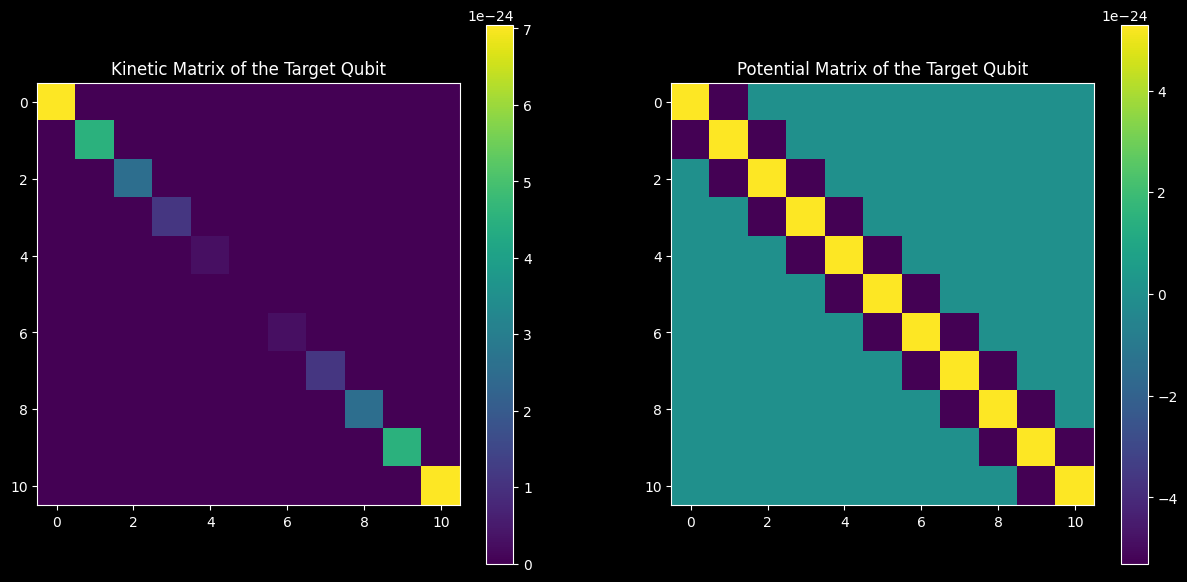

In [6]:
kin_target = system_10.get_kinetic_target()
pot_target = system_10.get_potential_target()

kin_target = kin_target.full()
pot_target = pot_target.full()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Target Qubit')
im1 = ax1.imshow(np.real(kin_target), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Target Qubit')
im2 = ax2.imshow(np.real(pot_target), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

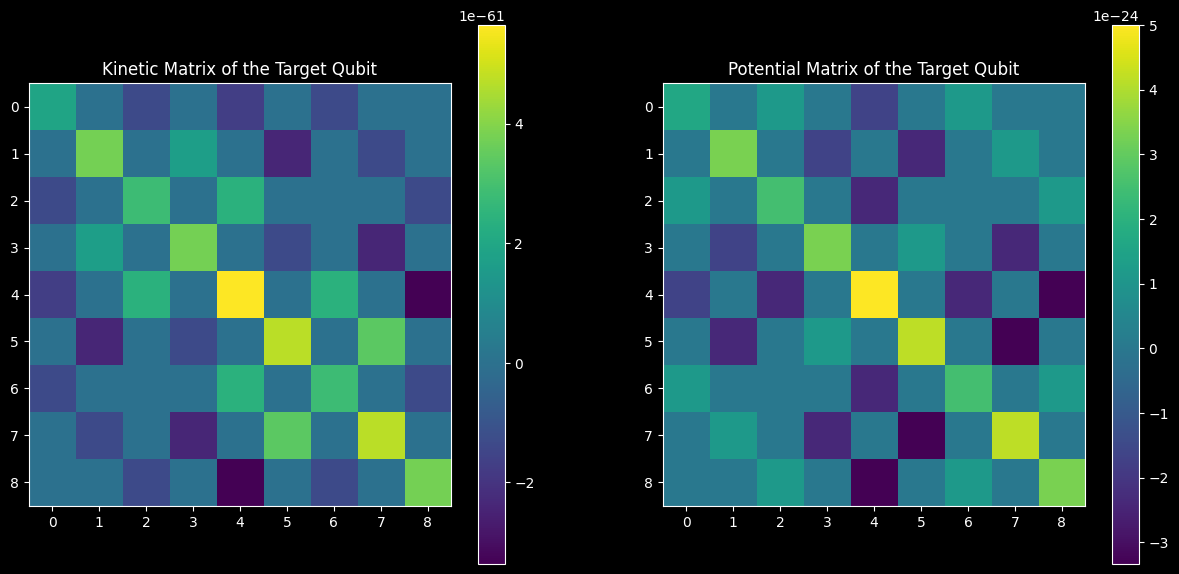

In [7]:
kin_target = system_10.get_kinetic_resonator()
pot_target = system_10.get_potential_resonator()

kin_target = kin_target.full()
pot_target = pot_target.full()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Resonator')
im1 = ax1.imshow(np.real(kin_target), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Resonator')
im2 = ax2.imshow(np.real(pot_target), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

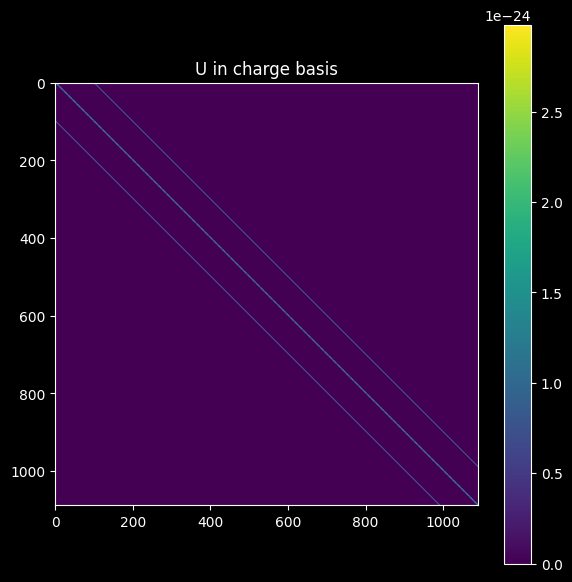

In [8]:
kin_target = system_10.get_U_circuit()

kin_target = kin_target.full()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('U in charge basis')
im1 = ax1.imshow(np.real(kin_target), cmap=plt.get_cmap(thememap))
f.colorbar(im1)


f.colorbar(im2)
ax1.grid(False)

plt.show()

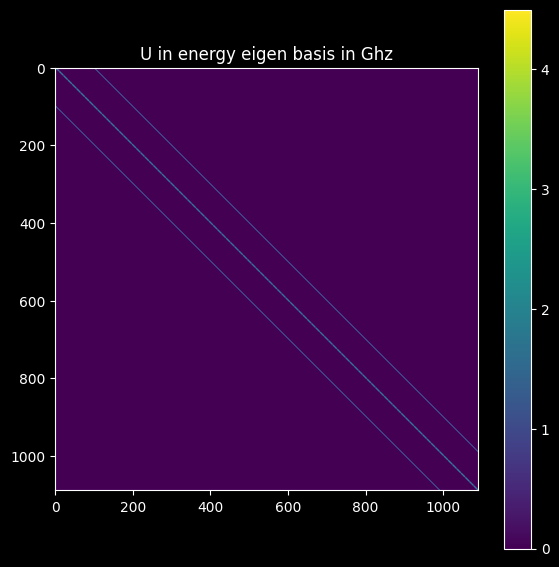

In [12]:
kin_target = system_10.get_U_circuit()


f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('U in energy eigen basis in Ghz')
im1 = ax1.imshow(np.real(kin_target)/constants.h*1e-9, cmap=plt.get_cmap(thememap))
f.colorbar(im1)


f.colorbar(im2)
ax1.grid(False)

plt.show()

### 2.2 Calculate Interaction

#### 2.2.1 Static visualization

#### 2.2.2 Coupling regarding defining parameters